# Customer Segmentation 2 

#### Agenda
1. Data Preparation <br>
Structure of the dt <br>
Missing Values <br>

2. Feature Engineering<br>
Age of Customers<br>
Income <br>
Months Since Enrollment<br>
Total items bought<br>
Age Groups<br>
Number of Children<br>
Marital Status<br>

3. Exploratory Data Analysis - Including statistical tests (T-tests, ANOVA)<br>
Average Spendings: Marital Status Wise<br>
Education Level<br>
Child Status<br>
Average Spendings: Child Status Wise<br>
Age Distribution of Customers<br>
Relationship: Age vs Purchase<br>
Customers Segmentation: Age Group Wise<br>
Average Purchase: Age Group Wise<br>
Relationship: Income vs Purchase<br>
Customer seniority vs Purchase <br>
Most Bought Products<br>
4. Modelling Clusters<br>
Data normalization <br>
Optimum Clusters Using Elbow Method<br>
Clusters Identification<br> 
<br>Not touched on: <br>
Clusters Interpretation<br>
Data Exploration: Lusters Based<br>
Customers Distribution<br>
Relationship: Income vs Spendings<br>
Spending Habits by Clusters<br>
Purchasing Habits by Clusters<br>
Promotions Acceptance by Clusters<br>
5. Inferences and Conclusions<br>
6. Answering Basic Questions<br>

### Set up

In [1]:
# Loading libraries
import pandas as pd 
import numpy as np 
import warnings
import scipy.stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dts
file = "D:\Myy Documents\[DS] All about Python\marketing_campaign.xlsx"
df = pd.read_excel(file)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 1. Data Prepapration

#### Structure of the dt

In [3]:
df.shape

(2240, 29)

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Many columns are not in the correct dtypes, we will correct them later when needed

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Missing Values

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are incredibly few missing values. Quite a complete dataset. However, we will also have to examine if there are any
inappropriates dtpoints, such as outliers.

Also, since there are few missing values for income, we can simply drop these rows.

In [7]:
df = df.dropna()

### 2. Feature Engineering

There is a lot of information given in the dataset related to the customers. In some cases we can group some columns together to create new features and in some cases we can create new columns based on the existing one's to create new features. This would help to better explore the data and draw meaningful insights from it.

#### Age

Since most of the activities by customers were between 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.

In [8]:
import datetime as dt
df['Age'] = 2016 - df['Year_Birth']
df['Age'].describe()

count    2216.000000
mean       47.179603
std        11.985554
min        20.000000
25%        39.000000
50%        46.000000
75%        57.000000
max       123.000000
Name: Age, dtype: float64

There are outliers in the Age column, we will drop these outliers.

In [9]:
df = df[df['Age']<100]

In [10]:
def hist_with_vline(data, column):
    """This function gets data and column name.
    Plots a histogram with 100 bins, draws a Vline of the column mean and median"""
   
    plt.figure(figsize=(12,6))
    _ = sns.histplot(df[column], bins= 100)
    plt.title('Histogram of ' + column + ' distribution')
    miny, y_lim = plt.ylim()
    plt.text(s = f"Mean  {column} : {df[column].mean():.2f}", x =df[column].mean() * 1.1,  y = y_lim * 0.95, color = 'r')
    _ =plt.axvline(df[column].mean(), color = 'r')
    _ = plt.axvline(df[column].median(), color = 'g')
    plt.text(s = f"Median {column} : {df[column].median():.2f}", x= df[column].median() * 1.1, y= y_lim * 0.90, color = 'g')

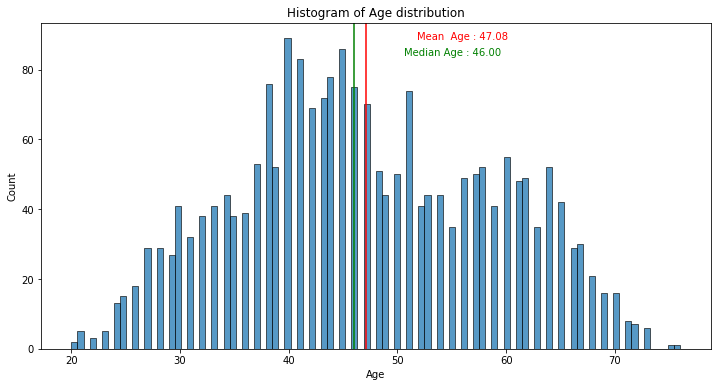

In [11]:
hist_with_vline(df, 'Age')

The majority of the customers are older than 40. 

#### Income

In [12]:
df.Income.describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

Quick examination (through hist) reveals that there is 1 outlier (Income = 666666). We will drop this value.

In [13]:
df = df[df['Income']<600000]

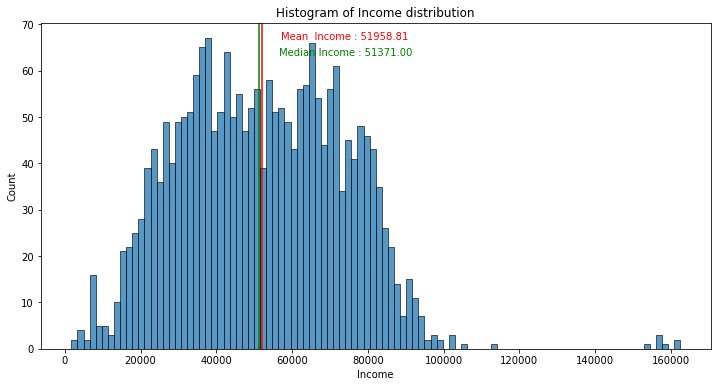

In [14]:
hist_with_vline(df, 'Income')

Both Age and Income are quite normally distributed (with mean and median values somewhat overlaping).

#### Months Since Enrollment

In [15]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['Date_Collected'] = '01-01-2015'
df['Date_Collected'] = pd.to_datetime(df.Date_Collected)
df['Days_Enrolled'] = (df['Date_Collected'] - df['Dt_Customer']).dt.days
df['Months_Enrolled'] = round(df['Days_Enrolled']/30)

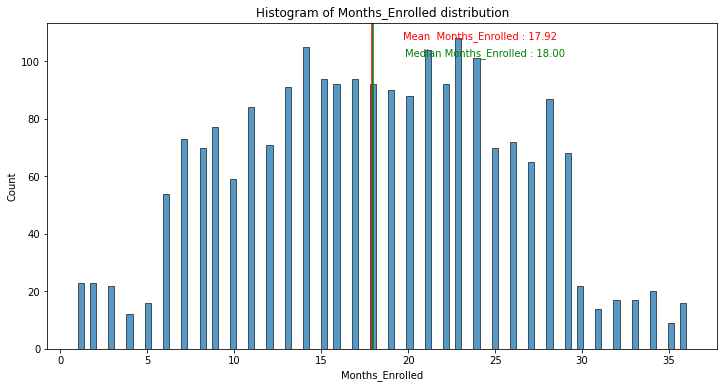

In [16]:
hist_with_vline(df, 'Months_Enrolled')

#### Total items bought

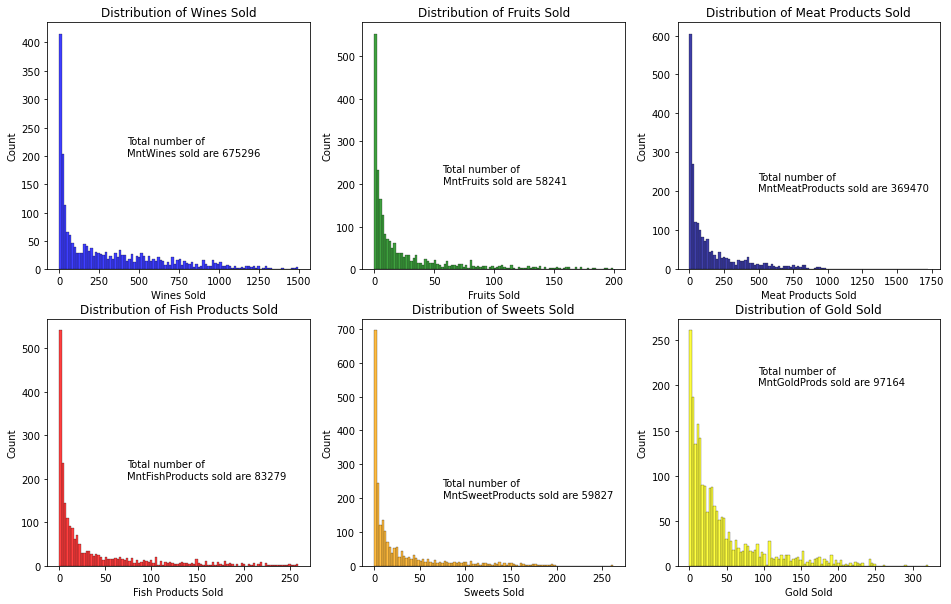

In [17]:
# First, we will examine how many units of each of the items were sold
columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
titles = ['Wines Sold', 'Fruits Sold', 'Meat Products Sold', 'Fish Products Sold', 'Sweets Sold', 'Gold Sold']
colors = ['blue', 'green', 'darkblue','red','orange','yellow']

fig, ax = plt.subplots(2,3, figsize=(16,10))
for i in range(len(columns)):
    sns.histplot(df[columns[i]], bins= 100, ax = ax[i//3, i%3],color=colors[i])
    ax[i//3, i%3].set_title('Distribution of ' + titles[i])
    ax[i//3, i%3].set_xlabel(titles[i])
    ax[i//3, i%3].text(s = f"Total number of \n{columns[i]} sold are {df[columns[i]].sum()} ",
                       x = df[columns[i]].max()/3.5, y = 200)

All products histograms are right skewed.<br> 
Generally, we can infer that Wines are the most sold items (675k) and Meat producs follow with 364k, while the Fruit and Sweet products are the least sold items (58k and 59k respectively).

In [18]:
# total items bought
df['total_items_bought'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

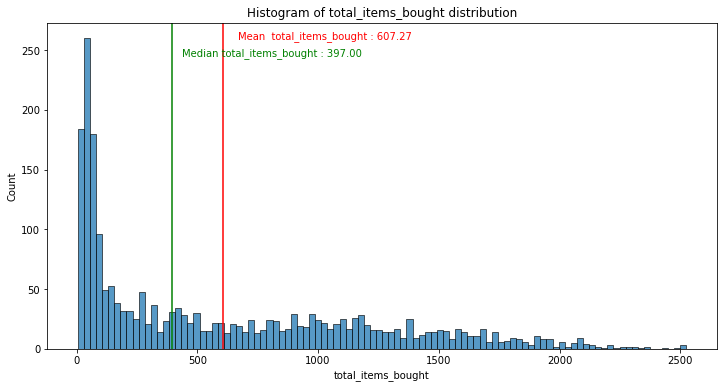

In [19]:
hist_with_vline(df, 'total_items_bought')

Most customers bought less than 200 items. However, there were also many people who bought more than 500 items.

#### Children

In [20]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [21]:
df.groupby(['Children']).size()

Children
0     632
1    1114
2     416
3      50
dtype: int64

Most households have 1 child and very few have 3.

#### Marital status

In [22]:
df.groupby(['Marital_Status']).size()

Marital_Status
Absurd        2
Alone         3
Divorced    231
Married     857
Single      470
Together    571
Widow        76
YOLO          2
dtype: int64

The dt provides very granulated info about marital status. However, for simplicity we can divide this value into two groups.

In [23]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

In [24]:
df.groupby(['Marital_Status']).size()

Marital_Status
Partner    1428
Single      784
dtype: int64

Two thirds of the customers lived with partners.

### 3. Exploratory Data Analysis 

#### Average purchase: Marital Status Wise

In [25]:
maritalpurchase = df.groupby('Marital_Status')['total_items_bought'].mean().sort_values(ascending=False)
maritalpurchase_df = pd.DataFrame(list(maritalpurchase.items()), columns=['Marital Status', 'Average purchase'])
maritalpurchase_df

,Marital Status,Average purchase
0,Single,624.283163
1,Partner,597.926471


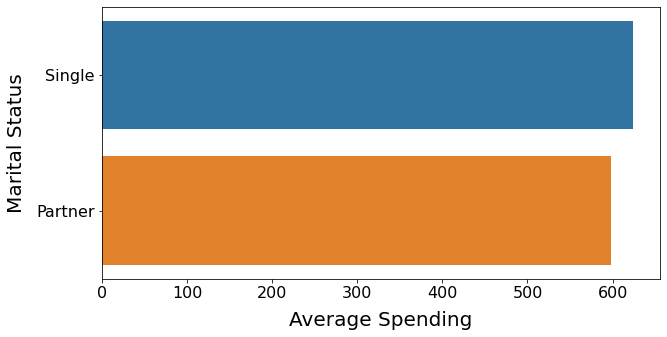

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data = maritalpurchase_df, x="Average purchase", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=10)
plt.ylabel('Marital Status', fontsize=20, labelpad=10);

In [27]:
singlepur = df[(df['Marital_Status'] == 'Single')].total_items_bought
partnerpur = df[(df['Marital_Status'] == 'Partner')].total_items_bought

In [28]:
from scipy import stats
stats.ttest_ind(singlepur, partnerpur)

Ttest_indResult(statistic=0.9841260072963055, pvalue=0.3251612864192599)

Although there is a discrepancy between the two groups, that difference is not statistically significant. There is not enough evidence to conclude that people who lived on their own purchased more than ones living with partners

In [29]:
#### Education Level

In [30]:
df['Education'].value_counts()  

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [31]:
# 2n Cycle = Master (Bologna Process)
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master') 

In [32]:
edupur = df.groupby('Education')['total_items_bought'].mean().sort_values(ascending=False)
edupur_df = pd.DataFrame(list(edupur.items()), columns=['Education', 'Average purchase'])
edupur_df

,Education,Average purchase
0,PhD,674.283333
1,Graduation,622.188341
2,Master,570.984014
3,Basic,81.796296


PhD-level customers seemed to have purchased the most. We will examine whether the discrepancy among education levels hold statistically.

In [33]:
phdpur = df[(df['Education'] == 'PhD')].total_items_bought
gradpur = df[(df['Education'] == 'Graduation')].total_items_bought
mspur = df[(df['Education'] == 'Master')].total_items_bought
basicpur = df[(df['Education'] == 'Basic')].total_items_bought

In [34]:
mspur.dtypes

dtype('int64')

In [35]:
# Quick box plots

def box_plot(data, column):
    fig, ax = plt.subplots(figsize=(12, 7))

    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')

    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

    # Set plot title
    ax.set_title('Purchase by ' + column)

    # Set species names as labels for the boxplot
    labels = df[column].unique()
    ax.boxplot(data, labels=labels)
    plt.show()

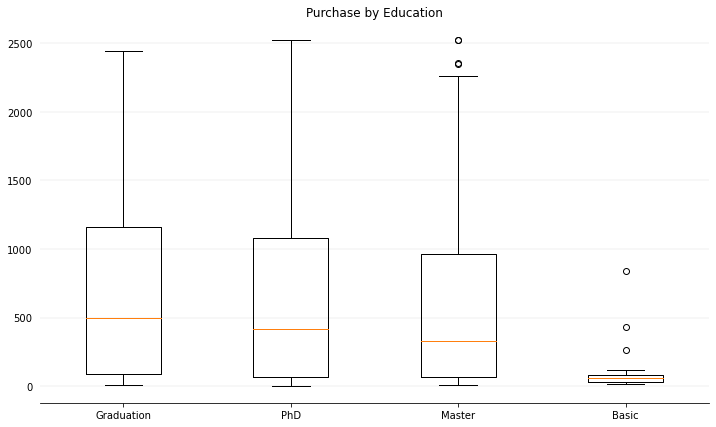

In [36]:
box_plot([phdpur, gradpur, mspur, basicpur], 'Education')

When the population means of only two groups is to be compared, the t-test is used, but when means of more than two groups are to be compared, ANOVA is preferred.

In [37]:
# ANOVA and Tukey hsd test
# Check if there was difference in mean values among education lv
from scipy.stats import f_oneway
f_oneway(phdpur, gradpur, mspur, basicpur)
# There is enough evidence that the avg purchase differ among education lv so we will carry out turkey hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df['total_items_bought'], ## values to compare
                          groups = df['Education'], ## how values are grouped, here by lv of Education
                          alpha=0.05) ## lv of significance
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
     Basic Graduation  540.392  0.001  326.8446 753.9395   True
     Basic     Master 489.1877  0.001  270.8579 707.5175   True
     Basic        PhD  592.487  0.001  372.5114 812.4627   True
Graduation     Master -51.2043 0.3449 -130.4409  28.0323  False
Graduation        PhD   52.095 0.3793    -31.57   135.76  False
    Master        PhD 103.2993 0.0273    8.0879 198.5107   True
---------------------------------------------------------------


We can conclude with confidence that the purchase disparities were significant between Basic and each of the other three and between Master and PhD customers.
Meanwhile, there was no signigicant difference in the amount purchased by Grad vs Master and PhD.

#### Average Spendings: Child Status Wise

In [38]:
nopur = df[(df['Children'] == 0)].total_items_bought
onepur = df[(df['Children'] == 1)].total_items_bought
twopur = df[(df['Children'] == 2)].total_items_bought
threepur = df[(df['Children'] == 3)].total_items_bought

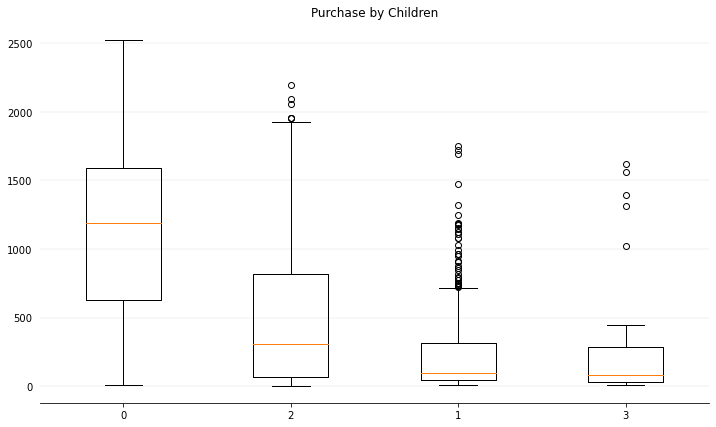

In [39]:
box_plot([nopur, onepur, twopur, threepur], 'Children')

Testing:

In [40]:
f_oneway(nopur, onepur, twopur, threepur)

F_onewayResult(statistic=305.58593025371937, pvalue=6.397201638039218e-166)

In [41]:
tukey = pairwise_tukeyhsd(endog = df['total_items_bought'], 
                          groups = df['Children'], 
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 -628.2202  0.001  -693.1097 -563.3307   True
     0      2 -857.3293  0.001  -939.5969 -775.0617   True
     0      3 -848.5649  0.001 -1039.9914 -657.1384   True
     1      2 -229.1091  0.001  -303.9795 -154.2388   True
     1      3 -220.3447 0.0142  -408.7106  -31.9788   True
     2      3    8.7644    0.9  -186.2716  203.8004  False
----------------------------------------------------------


Households with different number of children (1 exception, however) purchased different amounts.

#### Purchase vs Age (Scatterplot)

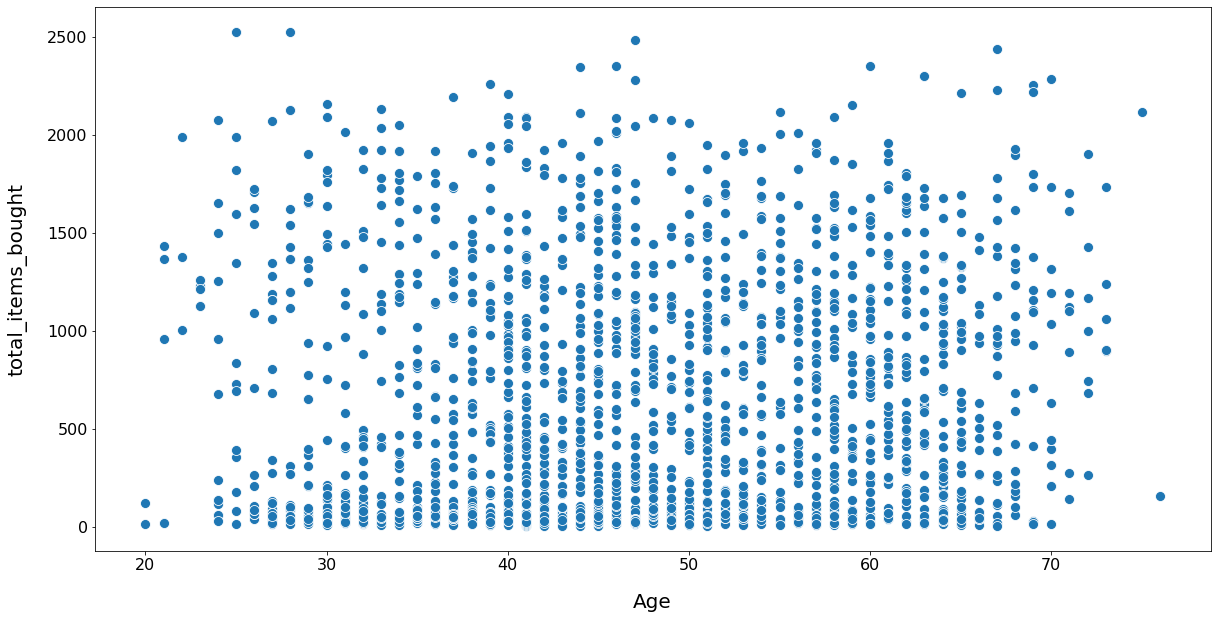

In [42]:
def scatter(x_axis,y_axis):
    plt.figure(figsize=(20,10))


    sns.scatterplot(x=df[x_axis], y=df[y_axis], s=100);

    plt.xticks( fontsize=16)
    plt.yticks( fontsize=16)
    plt.xlabel(x_axis, fontsize=20, labelpad=20)
    plt.ylabel(y_axis, fontsize=20, labelpad=20)
    
scatter('Age', 'total_items_bought')

All is noise, it seems that there is no relationship between customers' age and their purchasing behavior.

What about customers' seniority with the platform

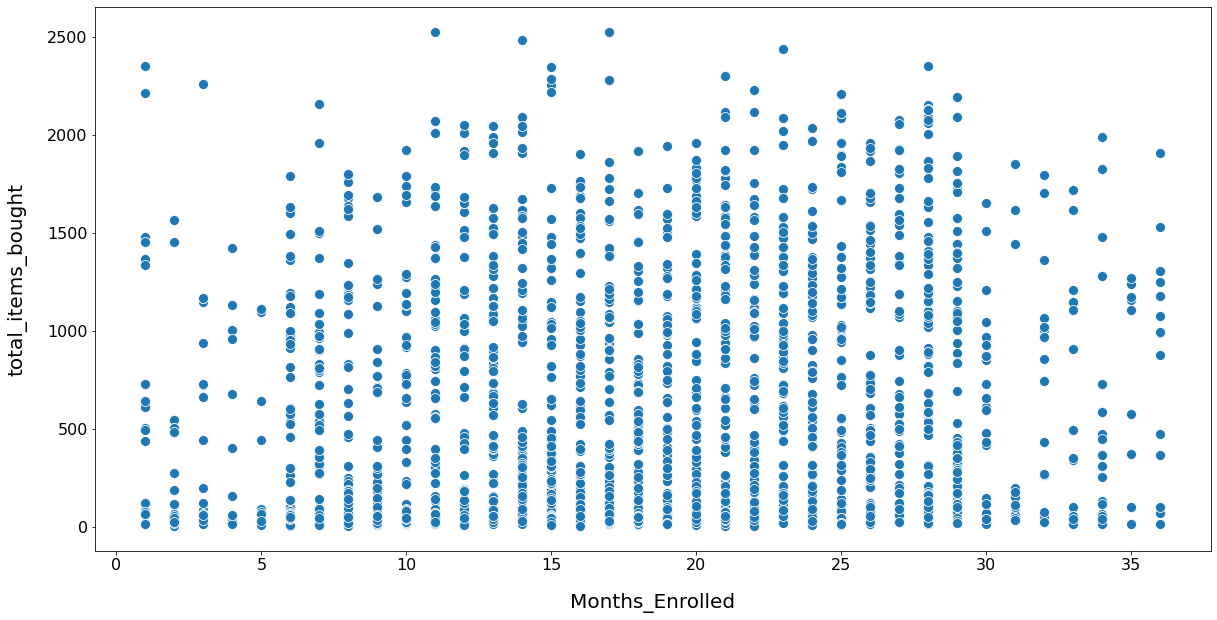

In [43]:
scatter('Months_Enrolled','total_items_bought')

Again, there is no particular pattern.

#### Purchase vs Income

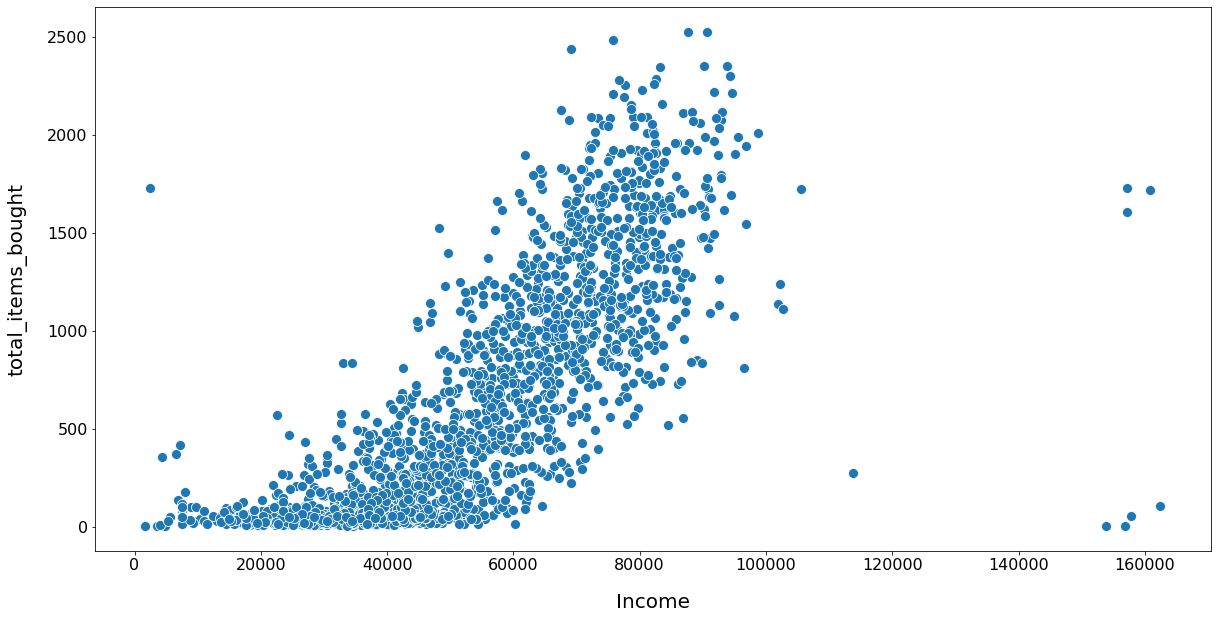

In [44]:
scatter('Income','total_items_bought')

A clear exponential relationship is present. 

#### Most bought items

In [45]:
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

product_means_df

,Product,Average Spending
0,MntWines,305.287523
1,MntMeatProducts,167.029837
2,MntGoldProds,43.925859
3,MntFishProducts,37.648734
4,MntSweetProducts,27.046564
5,MntFruits,26.329566


On average, wines were bought most, followed by meat products. The sales of these two products far exceeded the rest. 

### Clustering and Segmentation

In [46]:
# Based on the previous results, we conclude that factors leading to different purchase quantity are: Income, Education and Number of children
# We will keep only these factors in the dataset for cluster analysis and drop the other we deem unrelated
X = df.drop(['Year_Birth', 'ID', 'Days_Enrolled', 'Date_Collected', 'Age', 'Marital_Status', 'Kidhome', 'Months_Enrolled', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)
X.head()

,Education,Income,total_items_bought,Children
0,Graduation,58138.0,1617,0
1,Graduation,46344.0,27,2
2,Graduation,71613.0,776,0
3,Graduation,26646.0,53,1
4,PhD,58293.0,422,1


Since we also want to include categorical variables as bases for segmentation, traditional methods such as K-means clustering and Gaussian Mixture will not work. Here we will apply another method for clustering - K-Prototype to cluster data of mixed types (numerical and categorical)..

In [47]:
from sklearn import preprocessing
X_norm = X.copy()
scaler = preprocessing.MinMaxScaler()
X_norm[['Income', 'total_items_bought']] = scaler.fit_transform(X_norm[['Income', 'total_items_bought']])
X_norm.head(10)

,Education,Income,total_items_bought,Children
0,Graduation,0.351086,0.639683,0
1,Graduation,0.277680,0.008730,2
2,Graduation,0.434956,0.305952,0
3,Graduation,0.155079,0.019048,1
4,PhD,0.352051,0.165476,1
5,Master,0.378317,0.282143,1
6,Graduation,0.335508,0.232143,1
7,PhD,0.197452,0.065079,1
8,PhD,0.178139,0.016270,1
9,PhD,0.024386,0.017460,2


In [48]:
!pip install kmodes

In [73]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(X_norm, categorical=[0, 3]) # notify that the first and fourth column are categorical data 
#join data with labels 
labels = pd.DataFrame(clusters)
X_labeled = pd.concat((X,labels),axis=1)
X_labeled = X_labeled.rename({0:'cluster'},axis=1) # rename for the column from '0' to 'cluster'

In [50]:
X_labeled

,Education,Income,total_items_bought,Children,cluster
0,Graduation,58138.0,1617.0,0.0,2.0
1,Graduation,46344.0,27.0,2.0,1.0
2,Graduation,71613.0,776.0,0.0,2.0
3,Graduation,26646.0,53.0,1.0,0.0
4,PhD,58293.0,422.0,1.0,0.0
...,...,...,...,...,...
2235,Graduation,61223.0,1341.0,1.0,NaN
2236,PhD,64014.0,444.0,3.0,NaN
2237,Graduation,56981.0,1241.0,0.0,NaN
2238,Master,69245.0,843.0,1.0,NaN


In [51]:
X_labeled.groupby(['cluster']).size()

cluster
0.0    1041
1.0     561
2.0     610
dtype: int64

In [52]:
X_labeled.isnull().sum()

Education             26
Income                26
total_items_bought    26
Children              26
cluster               26
dtype: int64

In [53]:
def scatter_labels(x_axis):
    plt.figure(figsize=(20,10))


    sns.scatterplot(x=X_labeled[x_axis], y=X_labeled['total_items_bought'], hue = X_labeled['cluster'], s=100);

    plt.xticks( fontsize=16)
    plt.yticks( fontsize=16)
    plt.xlabel(x_axis, fontsize=20, labelpad=20)
    plt.ylabel(X_labeled['total_items_bought'], fontsize=20, labelpad=20)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

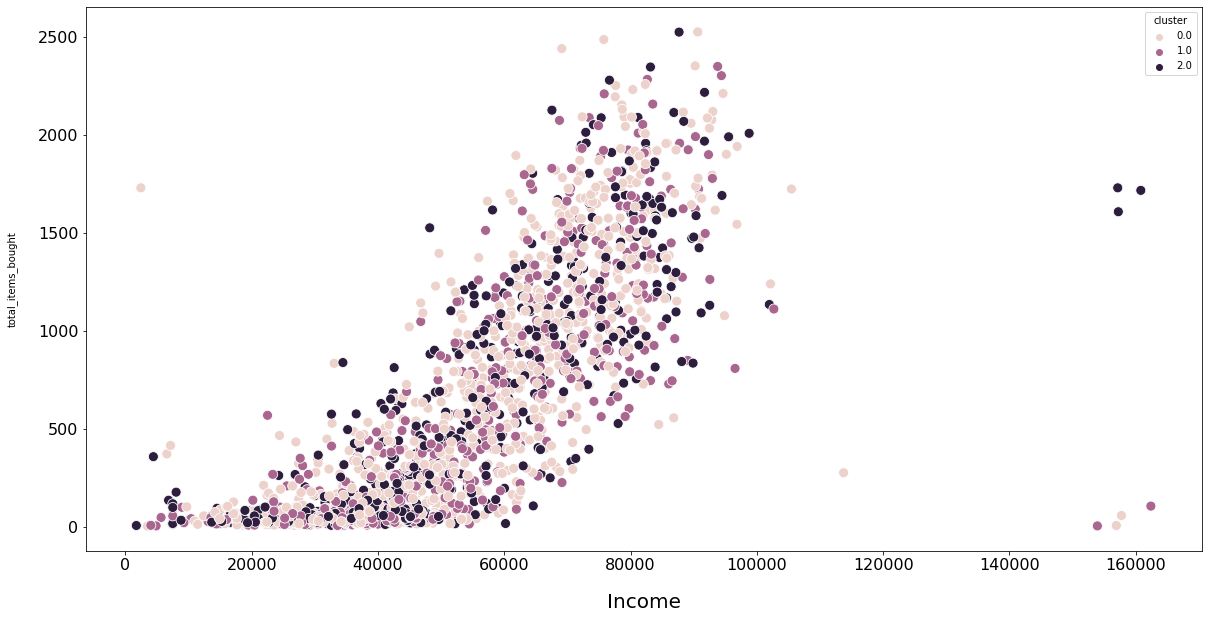

In [54]:
scatter_labels('Income')

In [ ]:
 plt.figure(figsize=(20,10))
sns.stripplot(x="Education", y="total_items_bought", hue="cluster", data=X_labeled)

There is no discernible pattern and similarity within clusters. We may want try another approach.

In [58]:
# We will try turning Income into a categorical factor. To do this, we will divide Income into quartiles. Furthermore, since
# all columns are categorical, we will apply the K-modes approach
# Divide Income values into quartile
X2 = X.copy()
X2.sort_values(by =['Income'], inplace = True)
X2['Income_Quartile']= pd.qcut(X2['Income'], q = 4, labels = False)
X2

,Education,Income,total_items_bought,Children,Income_Quartile
1245,Graduation,1730.0,8,0,0
21,Graduation,2447.0,1730,1,0
1524,Graduation,3502.0,5,1,0
1846,PhD,4023.0,9,2,0
1975,Graduation,4428.0,359,1,0
...,...,...,...,...,...
1653,Graduation,157146.0,1730,0,3
164,PhD,157243.0,1608,1,3
1300,Master,157733.0,59,1,3
687,PhD,160803.0,1717,0,3


In [89]:
# Divide purchase amouns into quartile
X2.sort_values(by =['total_items_bought'], inplace = True)
X2['Pur_Quartile']= pd.qcut(X2['total_items_bought'], q = 4, labels = False)
X2

,Education,Income,total_items_bought,Children,Income_Quartile,Pur_Quartile
1524,Graduation,3502.0,5,1,0,0
655,Graduation,153924.0,6,0,3,0
981,Graduation,4861.0,6,0,0,0
1420,PhD,34578.0,8,3,0,0
2129,Graduation,33590.0,8,3,0,0
...,...,...,...,...,...,...
1052,PhD,69098.0,2440,0,3,3
987,Graduation,75759.0,2486,0,3,3
1492,Graduation,87679.0,2524,0,3,3
1572,Master,90638.0,2525,0,3,3


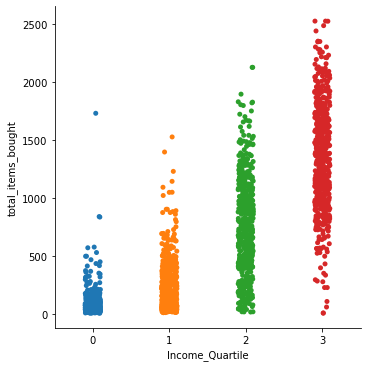

In [59]:
sns.catplot(x='Income_Quartile', y='total_items_bought', data=X2)

In [65]:
!pip install kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 9900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 9900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9900.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 460, cost: 8800.0
Run 1, iteration: 2/100, moves: 368, cost: 8496.0
Run 1, iteration: 3/100, moves: 275, cost: 8495.0
Run 1, iteration: 4/100, moves: 6, cost: 8495.0
Init: initializing centroids
Init: initializing clusters
Sta

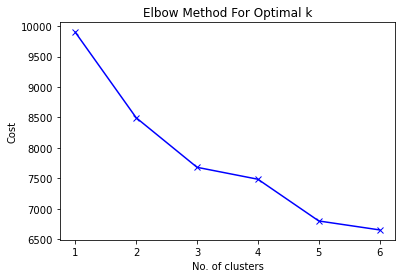

In [90]:
from kmodes import kmodes
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = kmodes.KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

The optimal number of clusters is 3.

In [91]:
# Building the model with 4 clusters
kmode = kmodes.KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters2 = kmode.fit_predict(X2)
clusters2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 8595.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 330, cost: 7717.0
Run 2, iteration: 2/100, moves: 0, cost: 7717.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 436, cost: 8150.0
Run 3, iteration: 2/100, moves: 54, cost: 8142.0
Run 3, iteration: 3/100, moves: 0, cost: 8142.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 213, cost: 7778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 996, cost: 7695.0
Run 5, iteration: 2/100, moves: 377, cost: 7686.0
Run 5, iteration: 3/100, moves: 5, cost: 7684.0
Run 5, iteration: 4/100, moves: 0, cost: 7684.0
Best run was number 5


array([2, 0, 2, ..., 0, 0, 0], dtype=uint16)

In [92]:
#join data with labels 
labels2 = pd.DataFrame(clusters2)
X2_labeled = pd.concat((X2,labels2),axis=1)
X2_labeled = X2_labeled.rename({0:'clusters2'},axis=1)
X2_labeled 

,Education,Income,total_items_bought,Children,Income_Quartile,Pur_Quartile,clusters2
0,Graduation,58138.0,1617.0,0.0,2.0,3.0,2.0
1,Graduation,46344.0,27.0,2.0,1.0,0.0,0.0
2,Graduation,71613.0,776.0,0.0,3.0,2.0,2.0
3,Graduation,26646.0,53.0,1.0,0.0,0.0,2.0
4,PhD,58293.0,422.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...
2235,Graduation,61223.0,1341.0,1.0,2.0,3.0,NaN
2236,PhD,64014.0,444.0,3.0,2.0,2.0,NaN
2237,Graduation,56981.0,1241.0,0.0,2.0,3.0,NaN
2238,Master,69245.0,843.0,1.0,3.0,2.0,NaN


In [93]:
X2_labeled.groupby(['clusters2']).size()

clusters2
0.0    834
1.0    747
2.0    631
dtype: int64

In [95]:
# Create a data frame consisting of modes for each column
cols = ['Education', 'Children','Income_Quartile', 'Pur_Quartile']
index = ['First Cluster', 'Second Cluster', 'Third Cluster']
from kmodes import cluster_centroids_ 
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index) # I'm asking for advice on how to create this df
# From the source I consulted he did successfully create such a df
# https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

ImportError: cannot import name 'cluster_centroids_' from 'kmodes' (D:\Anaconda\lib\site-packages\kmodes\__init__.py)

In [97]:
sns.scatterplot(data=X2, x='Income_Quartile', y='Pur_Quartile', hue='clusters2')

ValueError: Could not interpret value `clusters2` for parameter `hue`

After several attempts, I did not manage to find out the characteristics for each cluster. However, this project has been lengthy enough so I decided to temporarily end it here. I hope that in the near future I myself can help me with this project.